# Wrangling WeRateDogs Twitter 

## Table of Contents

- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assesing Data](#asses)
- [Cleaning Data](#clean)
- [Analysing Data](#analyse)
- [Reporting Data](#reporting)

<a id="intro"></a>
## Introduction
We wrangle WeRateDogs Twitter data to crate interesting and trustworthy analyses and visualizations.

<a id="gather"></a>
## Gathering Data

We gather three pieces of data:

- We Rate Dogs Twitter Archive via csv file (twitter_archive_enhanced.csv)
- Tweet Image Predictions via programmatic download (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- At least each tweet's retweet and favorite ("like") count via Twitter via Twitter API 

In [1]:
# import libaries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# gather we rate dogs twitter archive and store it in a seperate dataframe
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# gather tweet image predictions
url_image_predictions = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url_image_predictions)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
# store tweet image predictions in a seperate dataframe
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [43]:
# authentication twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# problem: Object of type 'Status' is not JSON serializable
# solution: https://github.com/tweepy/tweepy/issues/1102
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [44]:
# request tweet data from twitter api
tweet_ids = list(df_twitter_archive.tweet_id)
tweets = []
tweets_error = []

for tweet_id in tweet_ids:
    try: 
        tweet = api.get_status(tweet_id, tweet_mode = 'extended') # return tweet as full text attribute
        tweets.append(tweet)
    except:
        tweets_error.append(tweet)

Rate limit reached. Sleeping for: 730
Rate limit reached. Sleeping for: 731


In [45]:
# number of requested tweets and number of requested tweets with errors
len(tweets), len(tweets_error)

(2331, 25)

In [46]:
# store tweet data as tweet_json.txt
with open('tweet_json.txt', 'w', encoding='utf-8') as f:
    json.dump(tweets, f)

In [5]:
# read tweet_json.txt line by line into seperate dataframe with tweet id, retweet count and favorite count
df_tweet_data_api = pd.read_json('tweet_json.txt', encoding = 'utf-8')
df_tweet_data_api = df_tweet_data_api[['id', 'retweet_count', 'favorite_count']]
df_tweet_data_api.count()[0]

2331

<a id="gather"></a>
### Assessing Data

After gathering each of the three pieces of data, we assess them visually and programmatically for quality and tidiness issues.

- We document at least 8 quality issues
- We document at least 2 tidiness issues

#### Visually: Twitter Archive

In [6]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_twitter_archive.sample(50)
# name has none entries and entries like "a" or "the"
# rating numerator and rating denominator have entries with huge numbers
# expanded_urls has nan entries
# in text are tweets that are retweets like "RT @dog_rates"
# timestamp includes date and time

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
319,834477809192075265,NaN,NaN,2017-02-22 18:59:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leo. He was a skater pu...,8.295020e+17,4.196984e+09,2017-02-09 01:27:41 +0000,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
1423,697995514407682048,NaN,NaN,2016-02-12 04:07:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/697995514...,11,10,None,None,None,None,None
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
2247,667873844930215936,NaN,NaN,2015-11-21 01:15:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Neat dog. Lots of spikes. Always in push-up po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667873844...,10,10,None,None,None,None,None
458,817908911860748288,NaN,NaN,2017-01-08 01:40:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Looks like he went cross-eyed trying way too h...,NaN,NaN,NaN,https://twitter.com/micahgrimes/status/8179020...,12,10,None,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None


#### Pragmatically: Twitter Archive

In [8]:
df_twitter_archive.describe()
# rating numerator has high max rate
# rating numerator mean is 13.13
# rating denominator has high max rate
# rating denominator mean is 10.46

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df_twitter_archive.info()
# tweet id is interger
# timestamp is object
# rating_numerator is integer
# rating_denominator is integer
# doggo, floofer, pupper, puppo have own column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# count distinct values (nunique), only non-null values (count) and values including null values (size)
df_twitter_archive.agg(['nunique','count','size'])
# 181 retweets from 25 users
# 2218 distinct expanded_urls, 2297 non null entries, 2356 entries in total
# 40 distinct rating_numerators
# 18 distinct rating denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
nunique,2356,77,31,2356,4,2356,181,25,181,2218,40,18,957,2,2,2,2
count,2356,78,78,2356,2356,2356,181,181,181,2297,2356,2356,2356,2356,2356,2356,2356
size,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356,2356


In [11]:
sum(df_twitter_archive.tweet_id.duplicated())
# no duplicated twitter ids

0

In [12]:
df_twitter_archive.rating_numerator.value_counts()
# a few outliers such 420, 960 or 1776

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
df_twitter_archive.rating_denominator.value_counts()
# a few values > 10

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# set max column with to 200
pd.set_option('display.max_colwidth', 200)
# check rating numerator > 14
df_twitter_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].query('rating_numerator > 14')
# retweets with high ratings or wrong entries (e.g. index: 313)
# tweets with wrong ratings (index: 695, 763, 1202, 1712)
# tweets with high ratings rate more than one dog (index: 433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843)
# tweets are mistaken as ratings (index: 516)
# tweets with outliers (index: 979, 1663, 2074)
# tweet relating to another tweet (index: 1634)

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,838150277551247360,@markhoppus 182/10,182,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


In [15]:
# set max column with to 200
pd.set_option('display.max_colwidth', 200)
# check rating for denominator != 10 and rating_numerator <= 14
df_twitter_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10 and rating_numerator <= 14')
# retweets with wrong numerators (e.g. index: 342)
# tweets with wrong ratings (index: 1662, 1165, 2335)
# tweets relating to another tweet (index: 1598)

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4,20
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [16]:
df_twitter_archive.name.value_counts()
# 745 none entries
# recurring values like "a", "the" or "an"
# wrong names start with small letter
# many None entries

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Bailey        7
Toby          7
Buddy         7
an            7
Leo           6
Jax           6
Stanley       6
Dave          6
Jack          6
Milo          6
Koda          6
Bella         6
Scout         6
Oscar         6
Rusty         6
Sammy         5
           ... 
Jonah         1
Harvey        1
Lucia         1
Raphael       1
his           1
Linus         1
Autumn        1
Vixen         1
Chubbs        1
Saydee        1
Willow        1
Clyde         1
Iroh          1
Ben           1
Trevith       1
Burt          1
Winifred      1
Grady         1
Kenzie        1
Fwed          1
Kuyu          1
old           1
Kial          1
Georgie       1
Bluebert      1
Jerome        1
Fillup        1
this          1
Skye          1
Timmy         1
Name: name, Length: 957,

In [17]:
list(df_twitter_archive.expanded_urls)
# tweets without expanded urls have no image or video

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1',
 'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1',
 'https://twitte

#### Visually: Image Predictions

In [18]:
df_image_predictions.head()
# column headers like p1 or p1_conf not descriptive

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_image_predictions.sample(50)
# p1 contains not-dog-like entries like "wood_rabbit"
# p1_dog is not always true

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1600,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.022500,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/699072391083880449/pu/img/fMp1-dvLMeio1Kzk.jpg,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1450,776218204058357768,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True


#### Pragmatically: Image Predictions

In [20]:
df_image_predictions.info()
# tweet id is integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image_predictions.describe()
# p1 mean is 0.60 with max 1
# p2 mean is 0.13 with max 0,48
# p3 mean is 0.06 with max 0,27

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# count distinct values (nunique), only non-null values (count) and values including null values (size)
df_image_predictions.agg(['nunique','count','size'])
# 2009 distinct values for jpg_url

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
nunique,2075,2009,4,378,2006,2,405,2004,2,408,2006,2
count,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075
size,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075


In [23]:
sum(df_image_predictions.tweet_id.duplicated())
# no duplicated tweet ids

0

In [24]:
df_image_predictions.p1.value_counts()
# contans non-dog-like values like "beaver" or "snowmobile"

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [25]:
df_image_predictions.p1_dog.value_counts()
# 1532 values are dogs

True     1532
False     543
Name: p1_dog, dtype: int64

#### Visually: Image Predictions

In [26]:
df_tweet_data_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,7386,35092
1,892177421306343426,5499,30379
2,891815181378084864,3634,22837
3,891689557279858688,7560,38361
4,891327558926688256,8145,36642


In [27]:
df_tweet_data_api.sample(50)

,id,retweet_count,favorite_count
896,756526248105566208,3464,10137
1426,695816827381944320,1105,2906
454,816816676327063552,1996,9847
1905,674038233588723717,394,1033
125,867072653475098625,106,0
1507,690015576308211712,702,2399
1001,746369468511756288,1569,5996
126,867051520902168576,7084,29769
1797,676575501977128964,1052,2439
914,753294487569522689,1006,3267


#### Pragmatically: Image Predictions

In [28]:
df_tweet_data_api.info()
# column is named "id"
# id is integer
# retweet_count is integer
# favorite_count is integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [29]:
sum(df_tweet_data_api.id.duplicated())
# no duplicated tweet ids

0

In [30]:
df_tweet_data_api.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2596.115830,7328.528529
std,6.823170e+16,4391.749558,11381.268903
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,527.000000,1272.500000
50%,7.182469e+17,1211.000000,3183.000000
75%,7.986692e+17,3009.000000,8957.000000
max,8.924206e+17,74523.000000,150910.000000


In [31]:
df_tweet_data_api.retweet_count.value_counts()

436     6
918     5
217     5
640     5
537     4
498     4
418     4
686     4
783     4
591     4
589     4
496     4
147     4
333     4
60      4
71      4
1211    4
2267    3
347     3
254     3
236     3
357     3
3083    3
140     3
369     3
399     3
427     3
213     3
229     3
115     3
       ..
2472    1
2474    1
429     1
433     1
2482    1
2490    1
447     1
449     1
395     1
393     1
389     1
8577    1
329     1
1236    1
331     1
4431    1
339     1
2388    1
2390    1
345     1
2394    1
2396    1
349     1
359     1
361     1
3464    1
2414    1
4463    1
2426    1
4117    1
Name: retweet_count, Length: 1690, dtype: int64

In [32]:
df_tweet_data_api.favorite_count.value_counts()

0        163
882        4
2545       4
405        4
423        3
452        3
6569       3
1280       3
676        3
700        3
1107       3
3090       3
3149       3
858        3
1553       3
1241       3
1028       3
290        2
3566       2
3585       2
2324       2
301        2
9691       2
3948       2
1526       2
3540       2
1036       2
311        2
234        2
2368       2
        ... 
2646       1
29267      1
6738       1
2640       1
545        1
549        1
4647       1
2221       1
3008       1
2604       1
557        1
2606       1
6704       1
4657       1
18522      1
10806      1
7779       1
4665       1
2618       1
571        1
19004      1
55870      1
575        1
31296      1
4675       1
2628       1
4677       1
10824      1
2636       1
6126       1
Name: favorite_count, Length: 1986, dtype: int64

#### Quality

df_twitter_archive
- Columns with many nan entries
- Not all tweets have image or video URLs
- Tweets that have been retweeted are counted as orginal
- Timestamp datatype is object
- Tweet ID datatype is integer
- Rating columns datatype are integers
- Dog names have entries that are not names
- Rating numerator has extremly high ratings in some cases
- Rating denominator is not always 10

df_image_predictions
- twitter_id is integer
- There are duplicated images
- The confidence levels vary between 60% to 0,06%
- There are not dog related values in some columns
- Column names are not descriptive enough
- Dog races vary in upper and lower case and names with more than one word are separated by "_"


df_tweet_data_api
- Column with tweet ids is named different than in other dataframes
- Retweet and favorite datatype is integer

#### Tidiness

df_twitter_archive
- doggo, floofer, pupper and puppo are in 4 seperate columns
- Column timestamp includes date and time

General
- twitter archive data, image predicitions and twitter api data are in seperate tables

<a id="clean"></a>
### Cleaning Data

In [33]:
# Create copies of the original dataframes
archive_clean = df_twitter_archive.copy()
pred_clean = df_image_predictions.copy()
api_clean = df_tweet_data_api.copy()

#### Missing Data

##### df_twitter_archive: Columns with many nan entries

###### Define

Drop unnecessary colums "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id" and "retweeted_status_timestamp"

###### Code

In [34]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], axis = 1)

###### Test

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                    2356 non-null int64
timestamp                   2356 non-null object
source                      2356 non-null object
text                        2356 non-null object
retweeted_status_user_id    181 non-null float64
expanded_urls               2297 non-null object
rating_numerator            2356 non-null int64
rating_denominator          2356 non-null int64
name                        2356 non-null object
doggo                       2356 non-null object
floofer                     2356 non-null object
pupper                      2356 non-null object
puppo                       2356 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


##### df_twitter_archive: Not all tweets have image or video URLs

###### Define

Drop rows with no image or video URL

###### Code

In [36]:
archive_clean.drop(archive_clean[archive_clean['expanded_urls'].isnull() == True].index, inplace = True)

###### Test

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                    2297 non-null int64
timestamp                   2297 non-null object
source                      2297 non-null object
text                        2297 non-null object
retweeted_status_user_id    180 non-null float64
expanded_urls               2297 non-null object
rating_numerator            2297 non-null int64
rating_denominator          2297 non-null int64
name                        2297 non-null object
doggo                       2297 non-null object
floofer                     2297 non-null object
pupper                      2297 non-null object
puppo                       2297 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 251.2+ KB


##### df_twitter_archive: Tweets that have been retweeted are counted as orginal 

###### Define

Drop rows with retweeted_status_user_id and drop column retweeted_status_user_id

###### Code

In [38]:
# drop rows
archive_clean.drop(archive_clean[archive_clean['retweeted_status_user_id'].notnull() == True].index, inplace = True)

#drop column
archive_clean = archive_clean.drop(['retweeted_status_user_id'], axis = 1)

###### Test

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


##### Tidiness

##### df_twitter_archive: doggo, floofer, pupper and puppo are in 4 seperate columns

###### Define

Combine 4 seperate columns to column "dog_stage" and drop 4 seperate columns.

###### Code

In [40]:
# replace none values with empty string
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '') 

# combine colums to "dog_stage"
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

# show values
archive_clean.dog_stage.value_counts()

                1779
pupper           222
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [41]:
# replace empty string with nan
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

# replace combinations with various
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('doggopupper', 'Various')
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('doggofloofer', 'Various')
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('doggopuppo', 'Various')

# capitalize first letter
archive_clean['dog_stage'] = archive_clean['dog_stage'].str.title()

# show values
archive_clean.dog_stage.value_counts()

Pupper     222
Doggo       72
Puppo       23
Various     12
Floofer      9
Name: dog_stage, dtype: int64

In [42]:
# drop 4 columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

###### Test

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             338 non-null object
dtypes: int64(3), object(6)
memory usage: 165.4+ KB


##### df_twitter_archive: Column timestamp includes date and time

###### Define

Convert timestamp to datetime, extract date and time to new columns and drop timestamp column.

###### Code

In [44]:
# convert timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

# extract date and time to new columns
archive_clean['date'] = [d.date() for d in archive_clean['timestamp']]
archive_clean['time'] = [d.time() for d in archive_clean['timestamp']]

# drop timestamp column
archive_clean = archive_clean.drop('timestamp', axis = 1)

###### Test

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2117 non-null int64
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             338 non-null object
date                  2117 non-null object
time                  2117 non-null object
dtypes: int64(3), object(7)
memory usage: 181.9+ KB


#### Quality

##### df_twitter_archive: Date datatypes is object
##### df_twitter_archive: Tweet ID datatype is integer
##### df_twitter_archive: Rating columns datatype are integers

###### Define

Convert date and time to datetime
Convert tweet id to integer to string with astype
Convert rating numerator and rating denominator to float with astype

###### Code

In [46]:
# convert date to datetime
archive_clean['date'] = pd.to_datetime(archive_clean['date'])

# convert tweet_id to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

# convert rating_numerator to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

# convert rating_denominator to float
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

###### Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  2117 non-null object
dog_stage             338 non-null object
date                  2117 non-null datetime64[ns]
time                  2117 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 181.9+ KB


##### df_image_predictions: Twitter_id is integer

###### Define

Change tweet id column to datatype string

###### Code

In [48]:
pred_clean['tweet_id'] = pred_clean['tweet_id'].astype(str)

###### Test

In [49]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### df_tweet_data_api: Column with tweet ids is named different than in other dataframes
##### df_tweet_data_api: Retweet and favorite datatype is integer

###### Define

Rename tweet id column to tweet_id and change datatype to string
Change retweet and favorite datatype to float with astype

###### Code

In [50]:
# rename id column
api_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

# change tweet id column to datatype string
api_clean['tweet_id'] = api_clean['tweet_id'].astype(str)

# change retweet to float
api_clean['retweet_count'] = api_clean['retweet_count'].astype(float)

# change favorite to float
api_clean['favorite_count'] = api_clean['favorite_count'].astype(float)

###### Test

In [51]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null float64
favorite_count    2331 non-null float64
dtypes: float64(2), object(1)
memory usage: 54.7+ KB


##### df_twitter_archive: Dog names have entries that are not names

###### Define

Find lower case entries and replace wrong names with nan

###### Code

In [52]:
# find lower case entries and replace them with none
for item in archive_clean['name']:
    if str(item).islower() == True:
        archive_clean['name'] = archive_clean['name'].replace(item, 'None')   

In [53]:
list(archive_clean['name'].unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jersey',
 'Hobbes'

In [54]:
archive_clean.query('name == "O"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time
775,776201521193218049,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10.0,10.0,O,NaN,2016-09-14,23:30:38


In [55]:
# replace none with nan
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)
# replace "O" with O'Malley
archive_clean['name'] = archive_clean['name'].replace('O', 'OMalley')

###### Test

In [56]:
list(archive_clean['name'].unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'Dewey',
 'Scout',
 'Gizmo',
 'Walter',
 'Cooper',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Quinn',
 'Zooey',
 'Dave',
 'Jersey',
 'Hobbes',
 

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  1391 non-null object
dog_stage             338 non-null object
date                  2117 non-null datetime64[ns]
time                  2117 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 181.9+ KB


##### df_twitter_archive: Rating numerator has extremly high ratings in some cases
##### df_twitter_archive: Rating denominator is not always 10

###### Define

Fix tweets with wrong ratings, fix tweets with ratings for more than one dog, drop tweets with outliers and drop tweets relating to another tweets.

###### Code

In [58]:
# fix tweets with wrong ratings
archive_clean.loc[archive_clean.tweet_id=='786709082849828864',['rating_numerator','rating_denominator']]=[9.75,10]
archive_clean.loc[archive_clean.tweet_id=='778027034220126208',['rating_numerator','rating_denominator']]=[11.27,10]
archive_clean.loc[archive_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
archive_clean.loc[archive_clean.tweet_id=='680494726643068929',['rating_numerator','rating_denominator']]=[11.26,10]
archive_clean.loc[archive_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
archive_clean.loc[archive_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]
archive_clean.loc[archive_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
archive_clean.loc[archive_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]

# fix tweets with rating for more than one dog by rating_numerator = (rating_denominator / 10) / rating_numerator and rating denominator = 10
archive_clean.loc[archive_clean.tweet_id=='820690176645140481',['rating_numerator','rating_denominator']]=[12,10]
archive_clean.loc[archive_clean.tweet_id=='758467244762497024',['rating_numerator','rating_denominator']]=[11,10]
archive_clean.loc[archive_clean.tweet_id=='731156023742988288',['rating_numerator','rating_denominator']]=[12,10]
archive_clean.loc[archive_clean.tweet_id=='713900603437621249',['rating_numerator','rating_denominator']]=[11,10]
archive_clean.loc[archive_clean.tweet_id=='710658690886586372',['rating_numerator','rating_denominator']]=[10,10]
archive_clean.loc[archive_clean.tweet_id=='709198395643068416',['rating_numerator','rating_denominator']]=[9,10]
archive_clean.loc[archive_clean.tweet_id=='704054845121142784',['rating_numerator','rating_denominator']]=[12,10]
archive_clean.loc[archive_clean.tweet_id=='697463031882764288',['rating_numerator','rating_denominator']]=[11,10]
archive_clean.loc[archive_clean.tweet_id=='684222868335505415',['rating_numerator','rating_denominator']]=[11,10]
archive_clean.loc[archive_clean.tweet_id=='677716515794329600',['rating_numerator','rating_denominator']]=[12,10]
archive_clean.loc[archive_clean.tweet_id=='675853064436391936',['rating_numerator','rating_denominator']]=[11,10]

# drop tweets with outliers
archive_clean.drop(archive_clean[archive_clean.tweet_id=='749981277374128128'].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean.tweet_id=='749981277374128128'].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean.tweet_id=='682808988178739200'].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean.tweet_id=='670842764863651840'].index, inplace = True)

# drop tweets relating to another tweet mistaken as ratings
archive_clean.drop(archive_clean[archive_clean.tweet_id=='810984652412424192'].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean.tweet_id=='684225744407494656'].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean.tweet_id=='686035780142297088'].index, inplace = True)


###### Test

In [59]:
archive_clean['rating_numerator'].value_counts()

12.00    493
10.00    438
11.00    423
13.00    296
9.00     155
8.00      98
7.00      51
14.00     41
5.00      34
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       2
11.27      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [60]:
archive_clean['rating_denominator'].value_counts()

10.0    2113
Name: rating_denominator, dtype: int64

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2113 non-null object
source                2113 non-null object
text                  2113 non-null object
expanded_urls         2113 non-null object
rating_numerator      2113 non-null float64
rating_denominator    2113 non-null float64
name                  1389 non-null object
dog_stage             338 non-null object
date                  2113 non-null datetime64[ns]
time                  2113 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 181.6+ KB


##### df_image_predictions: There are duplicated images

###### Define

Drop rows with duplicate images.

###### Code

In [62]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [63]:
pred_clean = pred_clean.drop_duplicates(['jpg_url'])

###### Test

In [64]:
sum(pred_clean['jpg_url'].duplicated())

0

##### df_image_predictions: The confidence levels vary between 60% to 0,06%

###### Define

Drop p2 and p3 columns for accuracy

###### Code

In [65]:
pred_clean = pred_clean.drop('p2', axis = 1)
pred_clean = pred_clean.drop('p2_conf', axis = 1)
pred_clean = pred_clean.drop('p2_dog', axis = 1)
pred_clean = pred_clean.drop('p3', axis = 1)
pred_clean = pred_clean.drop('p3_conf', axis = 1)
pred_clean = pred_clean.drop('p3_dog', axis = 1)

###### Test

In [66]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 96.1+ KB


##### df_image_predictions: There are not dog related values in some columns

###### Define

Drop rows where dog is False

###### Code

In [67]:
pred_clean.drop(pred_clean[pred_clean['p1_dog'] == False].index, inplace = True)

###### Test

In [68]:
pred_clean['p1_dog'].value_counts()

True    1480
Name: p1_dog, dtype: int64

##### df_image_predictions: Column names are not descriptive enough

###### Define

Rename non descriptive columns, drop not necessary columns and add descriptive column names

###### Code

In [69]:
# rename column
pred_clean.rename(columns = {'p1': 'dog_breed', 'p1_conf': 'dog_race_conf'}, inplace = True)

# drop unnecessary columns
pred_clean = pred_clean.drop('p1_dog', axis = 1)

###### Test

In [70]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id         1480 non-null object
jpg_url          1480 non-null object
img_num          1480 non-null int64
dog_breed        1480 non-null object
dog_race_conf    1480 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 69.4+ KB


##### df_image_predictions: Dog races vary in upper and lower case and names with more than one word are separated by "_"

###### Define

Replace "_" with " " and capitalize first letter

###### Code

In [71]:
# Replace "_" with "" and capitalize first letter
pred_clean['dog_breed'] = pred_clean.dog_breed.str.replace('_', ' ').str.title()

###### Test

In [72]:
pred_clean['dog_breed'].value_counts()

Golden Retriever               139
Labrador Retriever              95
Pembroke                        88
Chihuahua                       79
Pug                             55
Chow                            41
Samoyed                         40
Toy Poodle                      38
Pomeranian                      38
Malamute                        29
Cocker Spaniel                  27
French Bulldog                  26
Chesapeake Bay Retriever        23
Miniature Pinscher              22
Siberian Husky                  20
German Shepherd                 20
Staffordshire Bullterrier       19
Shetland Sheepdog               18
Eskimo Dog                      18
Maltese Dog                     18
Shih-Tzu                        17
Rottweiler                      17
Beagle                          17
Cardigan                        17
Lakeland Terrier                16
Kuvasz                          16
Italian Greyhound               16
Great Pyrenees                  14
West Highland White 

#### Store Data

In [73]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2113 non-null object
source                2113 non-null object
text                  2113 non-null object
expanded_urls         2113 non-null object
rating_numerator      2113 non-null float64
rating_denominator    2113 non-null float64
name                  1389 non-null object
dog_stage             338 non-null object
date                  2113 non-null datetime64[ns]
time                  2113 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 181.6+ KB


In [74]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id         1480 non-null object
jpg_url          1480 non-null object
img_num          1480 non-null int64
dog_breed        1480 non-null object
dog_race_conf    1480 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 69.4+ KB


In [75]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null float64
favorite_count    2331 non-null float64
dtypes: float64(2), object(1)
memory usage: 54.7+ KB


In [76]:
# merge archive_clean and api_clean on tweet id
df_clean = pd.merge(archive_clean, api_clean, how='inner', on='tweet_id')              
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 12 columns):
tweet_id              2106 non-null object
source                2106 non-null object
text                  2106 non-null object
expanded_urls         2106 non-null object
rating_numerator      2106 non-null float64
rating_denominator    2106 non-null float64
name                  1382 non-null object
dog_stage             337 non-null object
date                  2106 non-null datetime64[ns]
time                  2106 non-null object
retweet_count         2106 non-null float64
favorite_count        2106 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 213.9+ KB


In [77]:
df_clean.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time,retweet_count,favorite_count
1054,709179584944730112,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Sammy. He's in a tree. Very excited about it. 13/10 https://t.co/CLe9ETEjeF,https://vine.co/v/iwAjdlEjwMl,13.0,10.0,Sammy,NaN,2016-03-14,00:49:23,643.0,1940.0
335,821044531881721856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flash. He went way too hard celebrating Martin Luther King Day last night. 12/10 now he's having a dream in his honor https://t.co/bryVdNaRcu,https://twitter.com/dog_rates/status/821044531881721856/photo/1,12.0,10.0,Flash,NaN,2017-01-16,17:20:45,2218.0,12445.0
1488,680100725817409536,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This pupper is not coming inside until she catches a snowflake on her tongue. 11/10 the determination is palpable https://t.co/lvMYbmKq8H,https://twitter.com/dog_rates/status/680100725817409536/photo/1,11.0,10.0,NaN,Pupper,2015-12-24,19:00:23,1309.0,3453.0
1522,678755239630127104,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dash. He didn't think the water would be that cold. Damn it Dash it's December. Think a little. 10/10 https://t.co/NqcOwG8pxW,https://twitter.com/dog_rates/status/678755239630127104/photo/1,10.0,10.0,Dash,NaN,2015-12-21,01:53:54,3100.0,6770.0
1710,673662677122719744,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kendall. 12/10 would cuddle the hell out of https://t.co/fJulMurnfj,https://twitter.com/dog_rates/status/673662677122719744/photo/1,12.0,10.0,Kendall,NaN,2015-12-07,00:37:52,342.0,1178.0


In [78]:
# store clean dataframe in csv files with as twitter_archive_master.csv
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [79]:
# merge df_clean and pred_clean on tweet id
df_clean_pred = pd.merge(df_clean, pred_clean, how='inner', on='tweet_id') 

In [80]:
df_clean_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 16 columns):
tweet_id              1468 non-null object
source                1468 non-null object
text                  1468 non-null object
expanded_urls         1468 non-null object
rating_numerator      1468 non-null float64
rating_denominator    1468 non-null float64
name                  1036 non-null object
dog_stage             227 non-null object
date                  1468 non-null datetime64[ns]
time                  1468 non-null object
retweet_count         1468 non-null float64
favorite_count        1468 non-null float64
jpg_url               1468 non-null object
img_num               1468 non-null int64
dog_breed             1468 non-null object
dog_race_conf         1468 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 195.0+ KB


In [81]:
df_clean_pred.sample(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time,retweet_count,favorite_count,jpg_url,img_num,dog_breed,dog_race_conf
96,865718153858494464,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Boomer. He's just checking pup on you. Hopes you had a good day. If not, he hopes he made it better. 13/10 extremely good boy https://t.co/pozUoHLkGg",https://twitter.com/dog_rates/status/865718153858494464/photo/1,13.0,10.0,Boomer,NaN,2017-05-19,23:57:46,5070.0,23814.0,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,Golden Retriever,0.673664
735,714606013974974464,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,https://twitter.com/dog_rates/status/714606013974974464/photo/1,12.0,10.0,NaN,NaN,2016-03-29,00:12:05,880.0,3500.0,https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg,1,Norfolk Terrier,0.293007
1337,669564461267722241,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10.0,NaN,NaN,2015-11-25,17:13:02,110.0,363.0,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,Toy Poodle,0.623685
68,874057562936811520,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",https://twitter.com/dog_rates/status/874057562936811520/photo/1,12.0,10.0,NaN,NaN,2017-06-12,00:15:36,3517.0,20840.0,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,Flat-Coated Retriever,0.832177
141,850019790995546112,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,"https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1",12.0,10.0,Boomer,Pupper,2017-04-06,16:18:05,4588.0,19516.0,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland Sheepdog,0.759907
326,805826884734976000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18,https://twitter.com/dog_rates/status/805826884734976000/video/1,12.0,10.0,Duke,NaN,2016-12-05,17:31:15,1787.0,6484.0,https://pbs.twimg.com/ext_tw_video_thumb/805826823359631360/pu/img/yr_fF0TZCR-B70p2.jpg,1,Siberian Husky,0.248926
54,878281511006478336,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13.0,10.0,Shadow,NaN,2017-06-23,16:00:04,1122.0,7042.0,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,Basset,0.320420
469,771770456517009408,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm,https://twitter.com/dog_rates/status/771770456517009408/photo/1,11.0,10.0,Davey,NaN,2016-09-02,18:03:10,3273.0,11731.0,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,Papillon,0.533180
926,692017291282812928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kingsley Wellensworth III. He owns 7 range rovers

In [82]:
df_clean_pred.to_csv('twitter_archive_pred.csv', index=False)

<a id="analyse"></a>
### Analysing Data

By analysing the data we produce at least three seperate insights presenting at least one labeled visualization

In [83]:
# Insight 1: Average rating, favorite count and retweet count per post

rating_mean = df_clean['rating_numerator'].mean()
favorite_mean = df_clean['favorite_count'].mean()
retweet_mean = df_clean['retweet_count'].mean()

rating_mean, favorite_mean, retweet_mean

(10.614567901234567, 8051.0251661918328, 2408.221272554606)

On average, each post gets 10.61/10 points, is liked 8051 times and retweeted 2408 times.

In [84]:
# favorites below and above average ratings)
above_avg_rating = df_clean.query('rating_numerator > {}'.format(rating_mean))
below_avg_rating = df_clean.query('rating_numerator <= {}'.format(rating_mean))

# mean of favorite below and above average ratings
avg_fav_above_avg_rating = above_avg_rating.favorite_count.mean()
avg_fav_below_avg_rating = below_avg_rating.favorite_count.mean()

avg_fav_above_avg_rating, avg_fav_below_avg_rating, avg_fav_above_avg_rating / avg_fav_below_avg_rating,

(11452.856685348279, 3093.1633605600932, 3.7026355708786287)

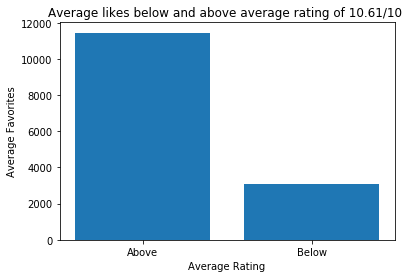

In [85]:
# Create a bar chart 
locations = [1, 2]
heights = [avg_fav_above_avg_rating, avg_fav_below_avg_rating]
labels = ['Above', 'Below']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average likes below and above average rating of 10.61/10 ')
plt.xlabel('Average Rating')
plt.ylabel('Average Favorites');

# save plot as jpg
fig = plt.gcf() 
fig.savefig('avg_likes_avg_ratings.jpg');

In [86]:
# mean of retweets below and above average ratings
avg_retweets_above_avg_rating = above_avg_rating.retweet_count.mean()
avg_retweets_below_avg_rating = below_avg_rating.retweet_count.mean()

avg_retweets_above_avg_rating, avg_retweets_below_avg_rating, avg_retweets_above_avg_rating / avg_retweets_below_avg_rating

(3324.6204963971177, 1072.6522753792299, 3.0994391870578166)

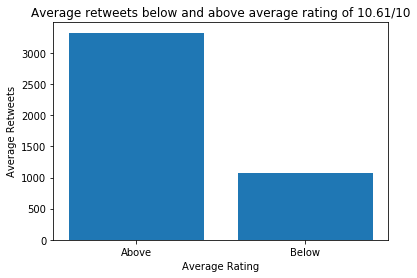

In [87]:
# Create a bar chart 
locations = [1, 2]
heights = [avg_retweets_above_avg_rating, avg_retweets_below_avg_rating]
labels = ['Above', 'Below']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average retweets below and above average rating of 10.61/10')
plt.xlabel('Average Rating')
plt.ylabel('Average Retweets');

#save plot as jpg
fig = plt.gcf() 
fig.savefig('avg_retweets_avg_ratings.jpg');

Tweets with an above-average rating receive on average 3.7 times more likes and 3 times more retweets. 

In [88]:
# insight 3: Top 10 preticted dog breeds

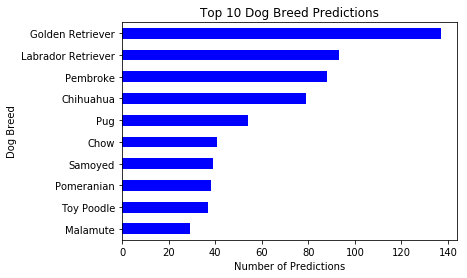

In [89]:
# create bar chart 
dog_breed = df_clean_pred['dog_breed'].value_counts()[9::-1]
dog_breed.plot(kind='barh', color='blue')
plt.title('Top 10 Dog Breed Predictions')
plt.xlabel('Number of Predictions')
plt.ylabel('Dog Breed');

#save plot as jpg
fig = plt.gcf() 
fig.savefig('top-10-dog-breeds.jpg', bbox_inches='tight');

The most frequently predicted was the Golden Retriever, followed by the Labrador Retriever, the the Pembroke and of course the Chihuahua.

In [90]:
# mean confidence level
df_clean_pred['dog_race_conf'].mean()

0.61372142247956407

When a dog was recognized, the probability of having recognized the correct dog breed was just about 60%.